In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

In [3]:

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [9]:
df.shape

(2515, 6)

In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327454,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702934,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676094,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095581,144114400


In [11]:
df=df.reset_index()

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [16]:
# df = df.drop(['Date', 'Adj Close'],axis =1 )

In [17]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


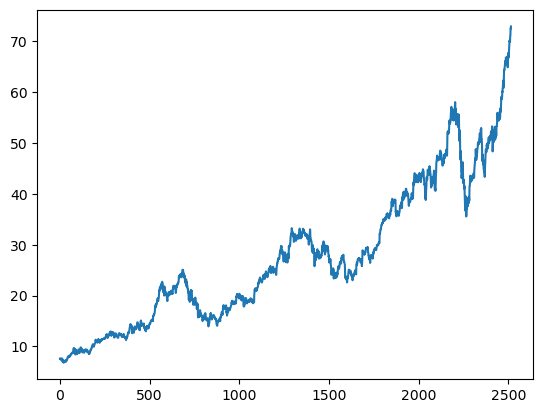

In [18]:
plt.plot(df.Close)

In [19]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [20]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

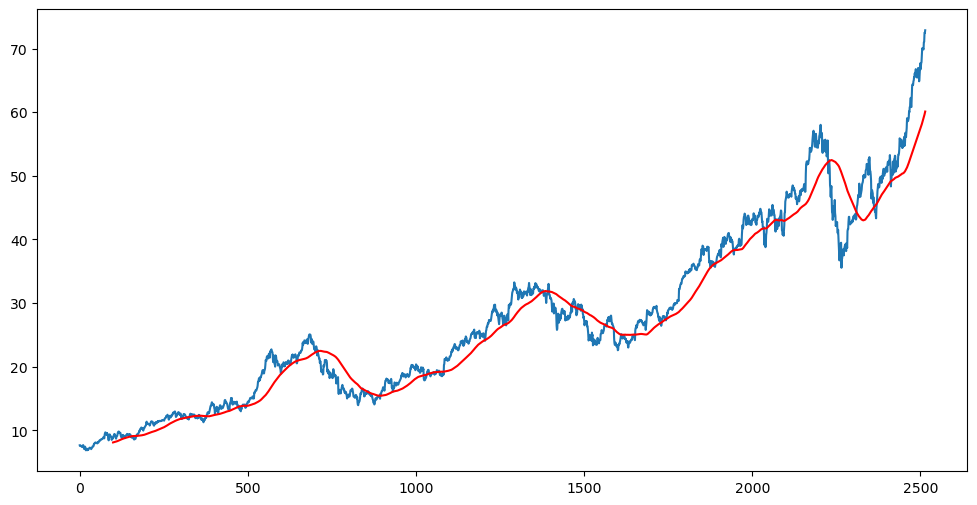

In [21]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [22]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

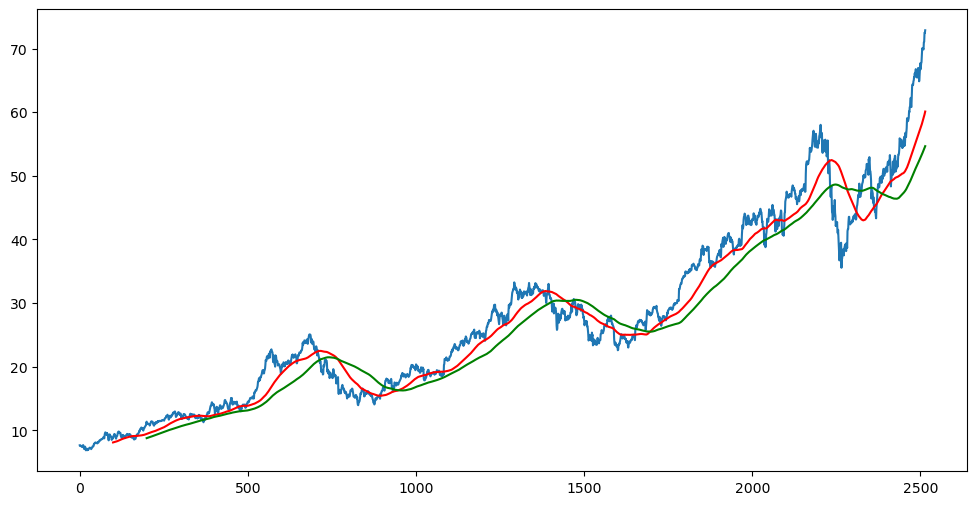

In [23]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [24]:
df.shape

(2515, 5)

In [25]:
#spliting data into training and testing 

data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  =pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)

print(data_testing.shape)

(1760, 1)
(755, 1)


In [26]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [27]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [30]:
data_training_array.shape

(1760, 1)

In [31]:
x_train = []
y_train = []
for i in range (100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i , 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train.shape

(1660, 100, 1)

In [33]:
# ml model

In [34]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [38]:
from keras.layers import Dense, Dropout, LSTM



In [39]:
from keras.models import Sequential


In [40]:
model = Sequential()
model.add (LSTM (units =50, activation = 'relu', return_sequences = True , input_shape = (x_train.shape[1],1)))
model.add (Dropout(0.2))


model = Sequential()
model.add (LSTM (units =60, activation = 'relu', return_sequences = True ))
model.add (Dropout(0.3))


model = Sequential()
model.add (LSTM (units =80, activation = 'relu', return_sequences = True ))
model.add (Dropout(0.4))


model = Sequential()
model.add (LSTM (units =120, activation = 'relu', ))
model.add (Dropout(0.5))


model.add(Dense(units =1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.build(input_shape=(None, x_train.shape[1], 1))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 120)               58560     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 58681 (229.22 KB)
Trainable params: 58681 (229.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 16s 76ms/step - loss: 0.0655
Epoch 2/50
52/52 [==============================] - 4s 81ms/step - loss: 0.0140
Epoch 3/50
52/52 [==============================] - 5s 88ms/step - loss: 0.0127
Epoch 4/50
52/52 [==============================] - 4s 85ms/step - loss: 0.0108
Epoch 5/50
52/52 [==============================] - 4s 76ms/step - loss: 0.0095
Epoch 6/50
52/52 [==============================] - 4s 78ms/step - loss: 0.0092
Epoch 7/50
52/52 [==============================] - 5s 91ms/step - loss: 0.0088
Epoch 8/50
52/52 [==============================] - 5s 86ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 5s 88ms/step - loss: 0.0083
Epoch 10/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 6s 117ms/step - loss: 0.0082
Epoch 12/50
52/52 [==============================] - 5s 100ms/step - loss: 0.0067
Epoch 13/50
52/52 [===============

In [43]:
model.save('keras_model.h5')

C:\Users\hardik\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [45]:
past_100_days = data_training.tail(100)

In [46]:
final_df = past_100_days.append(data_testing , ignore_index = True)

C:\Users\hardik\AppData\Local\Temp\ipykernel_3160\3207694217.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing , ignore_index = True)


In [47]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [48]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [49]:
input_data.shape

(855, 1)

In [50]:
x_test =[]
y_test = []
for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [51]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [52]:
# making prediction

In [53]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 16s 29ms/step


In [54]:
y_predicted.shape

(755, 1)

In [55]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [56]:
y_predicted

array([[0.09813613],
       [0.09938073],
       [0.10010767],
       [0.10081688],
       [0.10132642],
       [0.10194317],
       [0.10295388],
       [0.10428835],
       [0.10559681],
       [0.10709374],
       [0.10832459],
       [0.10940453],
       [0.11076495],
       [0.11201632],
       [0.11309677],
       [0.11416799],
       [0.11516841],
       [0.1160295 ],
       [0.1175265 ],
       [0.11893821],
       [0.12027764],
       [0.12141091],
       [0.12234733],
       [0.12621567],
       [0.12984769],
       [0.1336608 ],
       [0.1378726 ],
       [0.14244469],
       [0.14698996],
       [0.15140131],
       [0.1553474 ],
       [0.159428  ],
       [0.16386443],
       [0.16812286],
       [0.17193519],
       [0.17551333],
       [0.17910704],
       [0.18248582],
       [0.18524958],
       [0.18770334],
       [0.18991399],
       [0.1918197 ],
       [0.19459493],
       [0.19676746],
       [0.19905649],
       [0.20093383],
       [0.20266417],
       [0.203

In [57]:
scaler.scale_

array([0.02123255])

In [58]:
scale_factor =1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor 

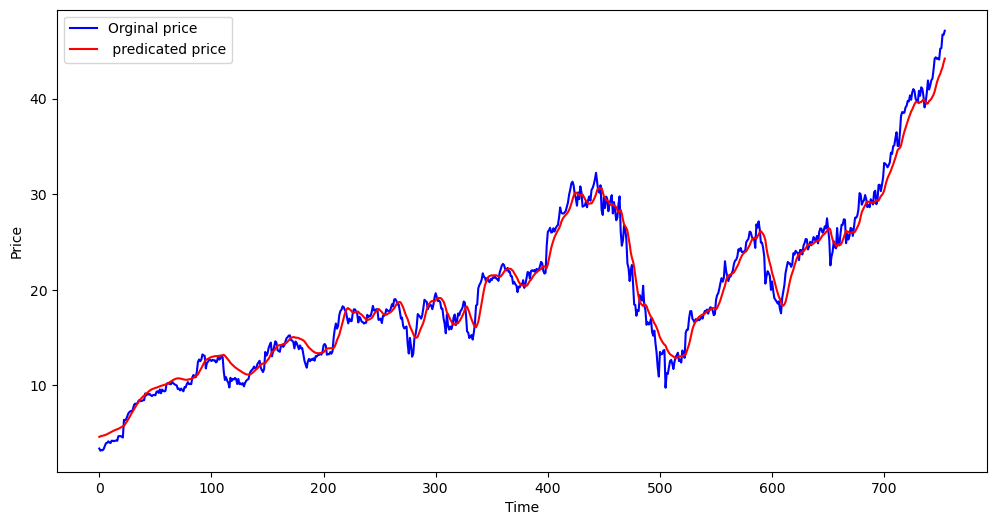

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orginal price')
plt.plot(y_predicted, 'r', label =' predicated price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [60]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [61]:
print(nltk.__version__)

3.8.1


In [5]:
help(nltk)

Help on package nltk:

NAME
    nltk

DESCRIPTION
    The Natural Language Toolkit (NLTK) is an open source Python library
    for Natural Language Processing.  A free online book is available.
    (If you use the library for academic research, please cite the book.)
    
    Steven Bird, Ewan Klein, and Edward Loper (2009).
    Natural Language Processing with Python.  O'Reilly Media Inc.
    https://www.nltk.org/book/
    
    isort:skip_file
    
    @version: 3.8.1

PACKAGE CONTENTS
    app (package)
    book
    ccg (package)
    chat (package)
    chunk (package)
    classify (package)
    cli
    cluster (package)
    collections
    collocations
    compat
    corpus (package)
    data
    decorators
    downloader
    draw (package)
    featstruct
    grammar
    help
    inference (package)
    internals
    jsontags
    langnames
    lazyimport
    lm (package)
    metrics (package)
    misc (package)
    parse (package)
    probability
    sem (package)
    sentiment (packa

In [63]:
pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [65]:
pip install alpha_vantage

In [66]:
from alpha_vantage.timeseries import TimeSeries

In [68]:
API_key ='I54UMULP2P9J2S09'

ts = TimeSeries(key = API_key, output_format='pandas')


data=ts.get_intraday('AAPL',interval = '5min')
data[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-09-18 19:55:00,178.320,178.500,178.31,178.500,19235.0
2023-09-18 19:50:00,178.290,178.340,178.23,178.340,3821.0
2023-09-18 19:45:00,178.250,178.310,178.21,178.310,10258.0
2023-09-18 19:40:00,178.230,178.250,178.21,178.250,2860.0
2023-09-18 19:35:00,178.290,178.290,178.21,178.230,6343.0
...,...,...,...,...,...
2023-09-18 12:00:00,178.265,178.420,178.20,178.330,542451.0
2023-09-18 11:55:00,178.280,178.310,178.19,178.265,607441.0
2023-09-18 11:50:00,178.005,178.290,177.98,178.280,633177.0


In [71]:
from alpha_vantage.fundamentaldata import FundamentalData
API_key ='I54UMULP2P9J2S09'

fd = FundamentalData(key = API_key, output_format='pandas')


data=fd.get_income_statement_annual('AAPL')
data[0]

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,2022-09-30,USD,170782000000,391397000000,248640000000,223546000000,119437000000,25094000000,26251000000,51345000000,...,8700000000,11104000000,119103000000,19300000000,2931000000,99803000000,88531000000,122034000000,130541000000,99803000000
1970-01-01 00:00:00.000000001,2021-09-30,USD,152836000000,363172000000,234954000000,212981000000,108949000000,21973000000,21914000000,43887000000,...,9500000000,11284000000,109207000000,14527000000,2645000000,94680000000,95249000000,111852000000,120233000000,94680000000
1970-01-01 00:00:00.000000002,2020-09-30,USD,104956000000,271642000000,189475000000,169559000000,66288000000,19916000000,18752000000,38668000000,...,9700000000,11056000000,67091000000,9680000000,2873000000,57411000000,57453000000,69964000000,77344000000,57411000000
1970-01-01 00:00:00.000000003,2019-09-30,USD,98392000000,256598000000,180027000000,161782000000,63930000000,18245000000,16217000000,34462000000,...,11300000000,12547000000,65737000000,10481000000,3576000000,55256000000,58037000000,69313000000,76477000000,55256000000
1970-01-01 00:00:00.000000004,2018-09-30,USD,101839000000,265595000000,163756000000,163756000000,70898000000,16705000000,14236000000,30941000000,...,9300000000,10903000000,72903000000,13372000000,3240000000,59531000000,56505000000,76143000000,81801000000,59531000000


In [72]:
API_key ='I54UMULP2P9J2S09'

fd = FundamentalData(key = API_key, output_format='pandas')


data=fd.get_balance_sheet_annual('AAPL')
data[0]

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,2022-09-30,USD,352755000000,135405000000,23646000000,48304000000,4946000000,60932000000,217350000000,42117000000,...,11128000000,98959000000,233256000000,60845000000,49142000000,50672000000,None,-3068000000,64849000000,15943425000
1970-01-01 00:00:00.000000001,2021-09-30,USD,351002000000,134836000000,34940000000,62639000000,6580000000,51506000000,216166000000,39440000000,...,9613000000,109106000000,241783000000,47493000000,53325000000,63090000000,None,5562000000,57365000000,16426786000
1970-01-01 00:00:00.000000002,2020-09-30,USD,323888000000,143713000000,38016000000,90943000000,4061000000,37445000000,180175000000,36766000000,...,8773000000,98667000000,216860000000,42684000000,54490000000,65339000000,None,14966000000,50779000000,16976763000
1970-01-01 00:00:00.000000003,2019-09-30,USD,338516000000,162819000000,48844000000,100557000000,4106000000,45804000000,175697000000,37378000000,...,10260000000,91807000000,209135000000,37720000000,50503000000,90488000000,None,45898000000,45174000000,4443236000
1970-01-01 00:00:00.000000004,2018-09-30,USD,365725000000,131339000000,25913000000,25913000000,3956000000,48995000000,234386000000,41304000000,...,8784000000,93735000000,220132000000,33327000000,48914000000,107147000000,None,70400000000,40201000000,4754986000


In [78]:
from alpha_vantage.fundamentaldata import FundamentalData

    
key= 'I54UMULP2P9J2S09'
fd =FundamentalData(key,output_format ='pandas')
# st.subheader('Balance Sheet')
balance_sheet = fd.get_balance_sheet_annual('AAPL')[0]
bs = balance_sheet.T[2:]
bs.columns = list(balance_sheet.T.iloc[0])
print(bs.columns)
# st.write(bs)
# st.subheader('Income Statment')
# income_statement = fd.get_income_statement_annual(ticker)[0]
# is1 = income_statement.T[2:]
# is1.columns =list(income_statement.T.iloc[0])
# st.write(is1)
# st.subheader('Cash Flow Statement')
# cash_flow = fd.get_cash_flow_annual(ticker)[0]
# sf = cash_flow.T[2:]
# cf.columns = list(cash_flow.T.iloc[0])
# st.write(cf)

Index(['2022-09-30', '2021-09-30', '2020-09-30', '2019-09-30', '2018-09-30'], dtype='object')
